In [151]:
from graphviz import Digraph
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [74]:
from random import shuffle as sl
from random import randint as rd
 
def gn():
    num = rd(1,1000)
    return num
def w2f(f,num,fg):
    f.write(str(num))
    if fg==True:
        f.write('\n')
    else:
        f.write(' ')
 
n = 10
def DataMake(c):
    MAXL =100000;
    f = open('data'+str(c)+'.txt','w')
    
    node = list(range(1,n+1))
    sl(node)
    sl(node)
    m = rd(1,min(n*n,5000))
    w2f(f,n,0);w2f(f,m,1)
    edges=[]
    count=0
    while count<m:
        p1 = rd (1,n-1)
        p2 = rd (p1+1,n)
        x = node[p1-1]
        y = node[p2-1]
        if [x,y] not in edges:
            edges.append([x,y])
            l = rd(1,MAXL)
            w = gn()
#         w2f(f,x,0);w2f(f,y,0);w2f(f,l,0);w2f(f,w,1)
 
            w2f(f,x,0);w2f(f,y,0);w2f(f,w,1)
            count+=1
    
    
#     k = gn()
#     w2f(f,k,1)
#     for i in range(0,k):
#         w2f(f,gn(),1)
#     print(n,' node',m,' edges',k,'Queries')
    print(n,' node',m,' edges')
    f.close()
 
DataMake(1)
print('Done')


10  node 18  edges
Done


In [ ]:
from graphviz import Digraph

f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)')
f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)')
f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)')
f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)')
f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)')
f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)')
f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)')
f.edge('LR_8', 'LR_5', label='S(a)')

f.view()

In [75]:
from graphviz import Digraph
f = Digraph('finite_state_machine', filename='fsm.gv')
with f.subgraph() as s:
    s.attr(rank='same')
    f.attr('node', shape='circle')
    for i in range(n):
        f.node(str(i))
    
    
# f.attr(rankdir='LR', size='8,5')


 
file1 = open('data'+str(1)+'.txt',"r")  
n,m=[int(x) for x in file1.readline().split()]

f.attr('node', shape='circle')
for i in range(n):
    f.node(str(i))

mat=np.zeros([n]*2)
f.attr('node', shape='circle')    
for i in range(m):
    i,j,k=[int(x) for x in file1.readline().split()]
    f.edge(str(i-1), str(j-1), label=str(k))
    mat[j-1,i-1]=k
#     print(i,j)
    
f.view()    

'fsm.gv.pdf'

In [ ]:
dic[]

In [80]:
dic=dict()  #key:node, value:list of the node's chidren
for j in range(n):
      dic.setdefault(str(j),[]);
      for i in range(n):
        if mat[i,j]!=0:
            dic[str(j)].append(i)
dic
nodes=range(n)
top_list=[]

def child(j):
    while dic[str(j)] != [] and not set(dic[str(j)]).issubset(set(top_list)):
        for i in dic[str(j)]:
            while dic[str(i)] !=[] and not set(dic[str(i)]).issubset(set(top_list)):   
                child(i)
            else:
                if  i not in top_list: 
                    top_list.append(i)
                    print("top_list=",top_list)
    else:
        if j not in top_list:
            top_list.append(j)
            print("top_list=",top_list)
                    
for j in nodes:
     child(j)

top_list
    
# def path(G, start, end):
    

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

{'0': [],
 '1': [5, 6, 7, 9],
 '2': [],
 '3': [0, 6],
 '4': [],
 '5': [0, 7],
 '6': [0],
 '7': [0, 3, 6],
 '8': [3, 4, 5, 9],
 '9': [6, 7]}

top_list= [0]
top_list= [0, 6]
top_list= [0, 6, 3]
top_list= [0, 6, 3, 7]
top_list= [0, 6, 3, 7, 5]
top_list= [0, 6, 3, 7, 5, 9]
top_list= [0, 6, 3, 7, 5, 9, 1]
top_list= [0, 6, 3, 7, 5, 9, 1, 2]
top_list= [0, 6, 3, 7, 5, 9, 1, 2, 4]
top_list= [0, 6, 3, 7, 5, 9, 1, 2, 4, 8]


[0, 6, 3, 7, 5, 9, 1, 2, 4, 8]

In [171]:
#3rd step: Enumerate paths:  produce all directed paths connecting two nodes V_i(node_label: start) to V_j(node_label: end).
import copy
def paths_given_two_nodes(dic,top_list, start, end):
    id_start=top_list.index(start)
    id_end=top_list.index(end)
    if id_start<=id_end:
        return None
    
    def add_path(new_node,path,paths):
        if top_list.index(new_node)>id_end:
            path.append(new_node)         
        elif top_list.index(new_node)==id_end:
            path.append(new_node)
            paths.append(copy.deepcopy(path))  #deepcopy is essential here!!
#             print('1',paths)    this print statement will produce strange result!!
            path.pop()
            return path,paths
        else:
            return path,paths
        
        for nn in dic[str(new_node)]:
            path,paths=add_path(nn,path,paths) 
        path.pop()
        return path,paths
    paths=[]
    path=[]
    path,paths=add_path(start,path,paths)
    return paths
   


In [172]:
#run 3rd step:
paths=paths_given_two_nodes(dic,top_list,8,6)
paths

[[8, 3, 6],
 [8, 5, 7, 3, 6],
 [8, 5, 7, 6],
 [8, 9, 6],
 [8, 9, 7, 3, 6],
 [8, 9, 7, 6]]

In [144]:
parents_dic=dict()  #key:node, value:list of the node's chidren
for i in range(n):
      s=parents_dic.setdefault(str(i),[]);
      for j in range(n):
        if mat[i,j]!=0:
            parents_dic[str(i)].append(j)

In [148]:
parents_dic;
dic;

In [149]:
#4th step: Generate data according to the structure of the graph:
n_sample=1000
Data=np.zeros((n_sample,n))
mod1=lambda num:np.random.normal(0,1,num)


for d in range(n_sample):
    Data[d,:]=mod1(n)  # first step: all nodes are assigned a random number with distribution N(0,1) 
    for i in range(n):
        for j in parents_dic[str(i)]:
            Data[d,i]=Data[d,i]+Data[d,j]  #for nodes with parents, the parents variables are added

    



-0.040355855442805344

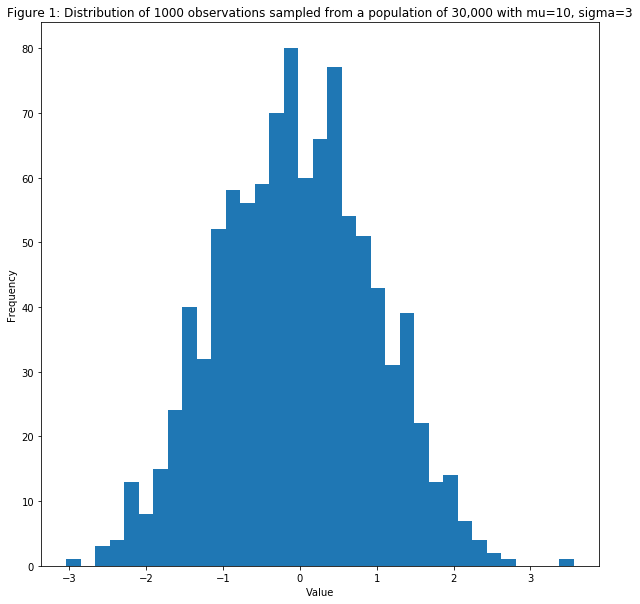

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
mod1=lambda num:np.random.normal(0,1,num)
population = mod1(30000);
observation = population[np.random.randint(0, 30000, 1000)];

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
s=ax.hist( observation,bins=35 ,)
s=ax.set_xlabel("Value");
s=ax.set_ylabel("Frequency");
s=ax.set_title("Figure 1: Distribution of 1000 observations sampled from a population of 30,000 with mu=10, sigma=3");
mu_obs=observation.mean()
mu_obs


0.004780886283039548

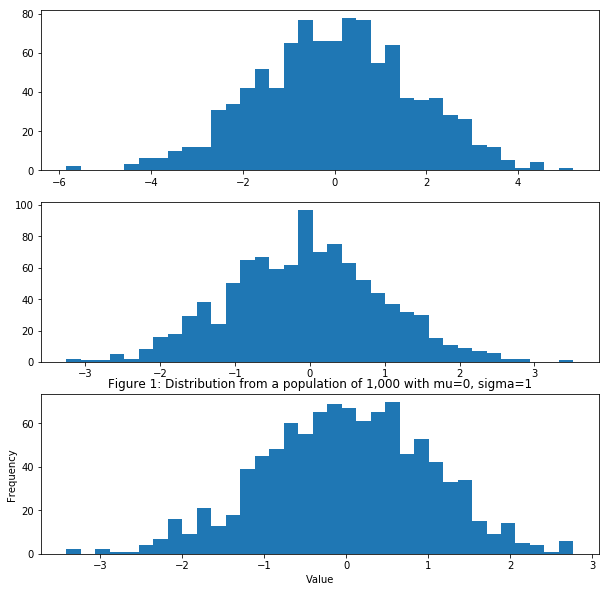

In [209]:
#target and feature selection:
df=pd.DataFrame(Data)
y=df[5]
X=df[[0,1,2,7,8]]
# Y[:3]
# Data[:3,5]
# df.shape
# X[1][:3]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(3,1,1)
s=ax.hist( np.array(y),bins=35 ,)
ax = fig.add_subplot(3,1,2)
s=ax.hist( np.array(X[1]),bins=35 ,)
ax = fig.add_subplot(3,1,3)
s=ax.hist( np.array(X[2]),bins=35 ,)

s=ax.set_xlabel("Value");
s=ax.set_ylabel("Frequency");
s=ax.set_title("Figure 1: Distribution from a population of 1,000 with mu=0, sigma=1");
mu_obs=y.mean()
mu_obs

In [159]:
import statsmodels.api as sm
from sklearn import linear_model

In [210]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      5   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     764.3
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:02:20   Log-Likelihood:                -1161.2
No. Observations:                1000   AIC:                             2332.
Df Residuals:                     995   BIC:                             2357.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0939      0.013      7.002      0.000       0.068       0.120
1              0.4486      0.041     10.855      0.000       0.368       0.530
2             -0.0106      0.024     -0.438      0.662      -0.058       0.037
7              0.2550      0.017     14.830      0.000       0.221       0.289
8              0.7416      0.030     24.888      0.000       0.683       0.800
==============================================================================
Omnibus:                        2.526   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                2.577
Skew:                          -0.103   Prob(JB):                        0.276
Kurtosis:                       2.862   Cond. No.                         6.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      5   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     769.8
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:02:35   Log-Likelihood:                -1158.0
No. Observations:                1000   AIC:                             2328.
Df Residuals:                     994   BIC:                             2357.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0625      0.025      2.549      0.011       0.014       0.111
0              0.0925      0.013      6.912      0.000       0.066       0.119
1              0.4522      0.041     10.966      0.000       0.371       0.533
2             -0.0099      0.024     -0.407      0.684      -0.057       0.038
7              0.2550      0.017     14.870      0.000       0.221       0.289
8              0.7432      0.030     25.004      0.000       0.685       0.802
==============================================================================
Omnibus:                        2.506   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                2.557
Skew:                          -0.103   Prob(JB):                        0.278
Kurtosis:                       2.862   Cond. No.                         6.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
model.predict().shape
model.fittedvalues.shape

(1000,)

(1000,)

In [213]:
# dir(model);
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(model)

In [219]:
iv_u.shape
x.shape

(1000,)

(1000,)

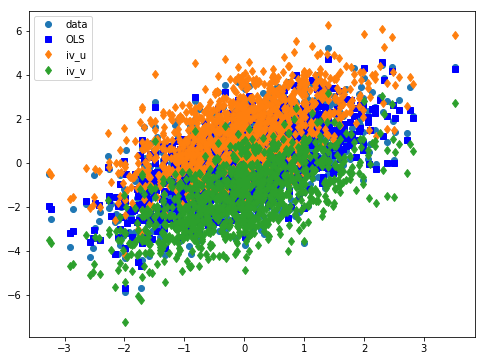

In [218]:
fig, ax = plt.subplots(figsize=(8,6))
x=X[1]
ax.plot(x, y, 'o', label="data")
# ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, model.fittedvalues, 'bs', label="OLS")
ax.plot(x, iv_u, 'd', label="iv_u")
ax.plot(x, iv_l, 'd', label="iv_v")
ax.legend(loc='best');

In [27]:
import graphviz

d = graphviz.Digraph()

with d.subgraph() as s:
    s.attr(rank='same')
    s.node('A')
    

d.node('C')

with d.subgraph() as s:
    s.attr(rank='same')
    s.node('B')
    s.node('D')
    s.node('Y')

d.edges(['AB', 'AC', 'CD'])

d.view()

'Digraph.gv.pdf'

In [200]:
# nsample = 50
# groups = np.zeros(nsample, int)
# groups[20:40] = 1
# groups[40:] = 2
# #dummy = (groups[:,None] == np.unique(groups)).astype(float)

# dummy = sm.categorical(groups, drop=True)
# x = np.linspace(0, 20, nsample)
# # drop reference category
# X = np.column_stack((x, dummy[:,1:]))
# X = sm.add_constant(X, prepend=False)


In [201]:
X;